In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [3]:
#spliting dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [4]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [7]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(X_train , y_train)

SVC(random_state=0)

In [8]:
#predict a test set
y_pred = classifier.predict(X_test)

In [10]:
#making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
cm

array([[55,  3],
       [ 1, 21]], dtype=int64)

C:\Users\fuadu\AppData\Local\Temp\ipykernel_6508\1825497388.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j,0],X_set[y_set==j,1],


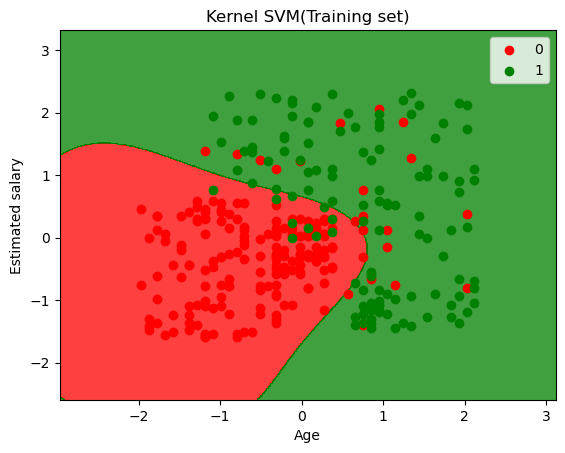

In [12]:
#visualising the Training set results
from matplotlib.colors import ListedColormap
X_set , y_set = X_train , y_train
X1 , X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step=0.01),np.arange(start=X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2 , classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set==j,1],
               c = ListedColormap(('red','green'))(i),label = j)
plt.title("Kernel SVM(Training set)")
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.legend()
plt.show()

C:\Users\fuadu\AppData\Local\Temp\ipykernel_6508\1618952264.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j,0],X_set[y_set==j,1],


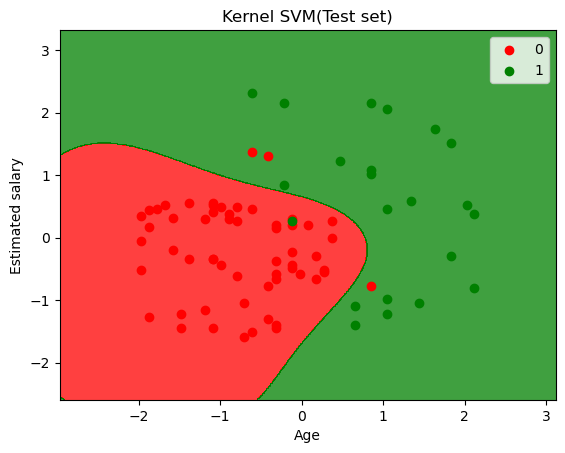

In [13]:
#visualising the test set results
from matplotlib.colors import ListedColormap
X_set , y_set = X_test , y_test
X1 , X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step=0.01),np.arange(start=X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2 , classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
            alpha=0.75,cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0],X_set[y_set==j,1],
               c = ListedColormap(('red','green'))(i),label = j)
plt.title("Kernel SVM(Test set)")
plt.xlabel('Age')
plt.ylabel('Estimated salary')
plt.legend()
plt.show()